In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")
from collections import Counter
import os

In [2]:
data = pd.read_csv("breast-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data["diagnosis"] = [1 if i.strip()=="M" else 0 for i in data.diagnosis]
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
data.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


<Figure size 1200x800 with 0 Axes>

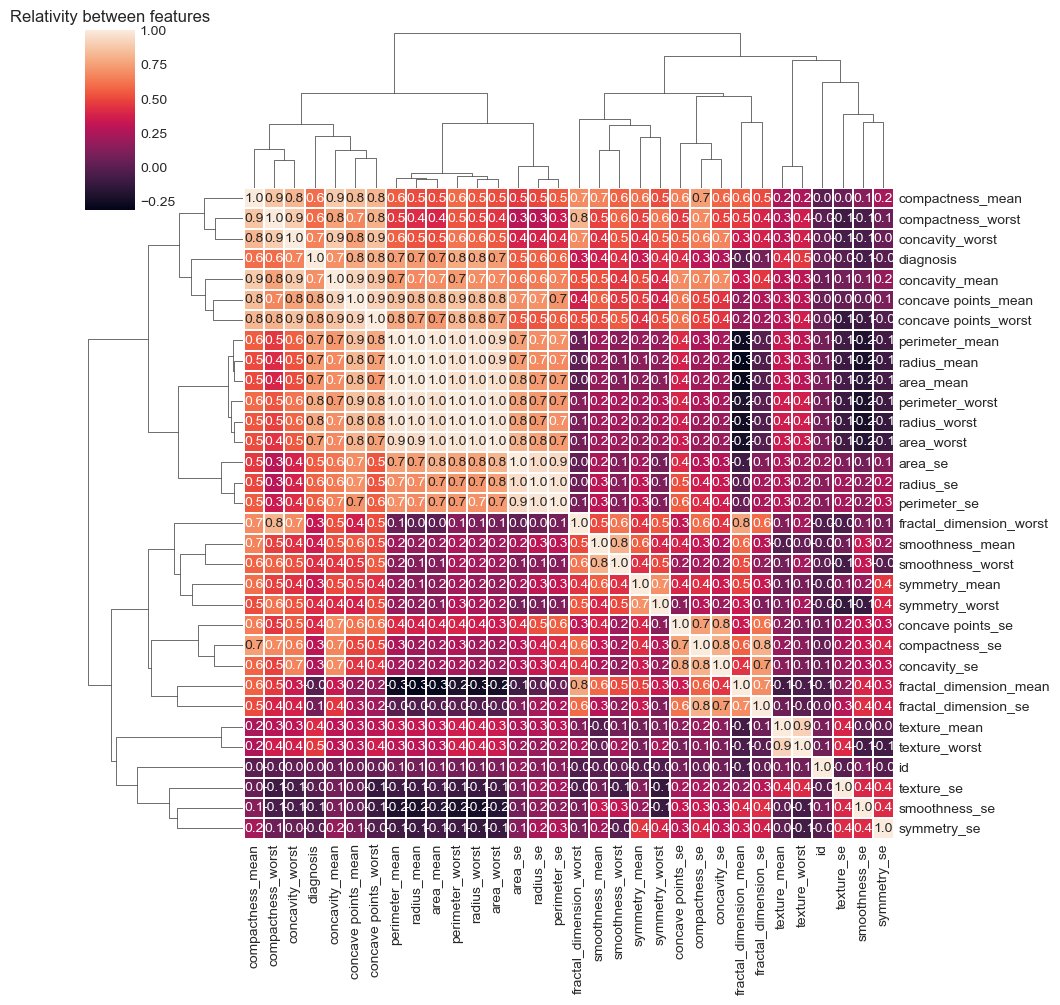

In [7]:
corr_mtrx = data.corr()
plt.figure(figsize = (12,8))
sns.clustermap(corr_mtrx, annot = True, fmt = ".1f", linewidths =.01)
plt.title("Relativity between features")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<Figure size 640x480 with 0 Axes>

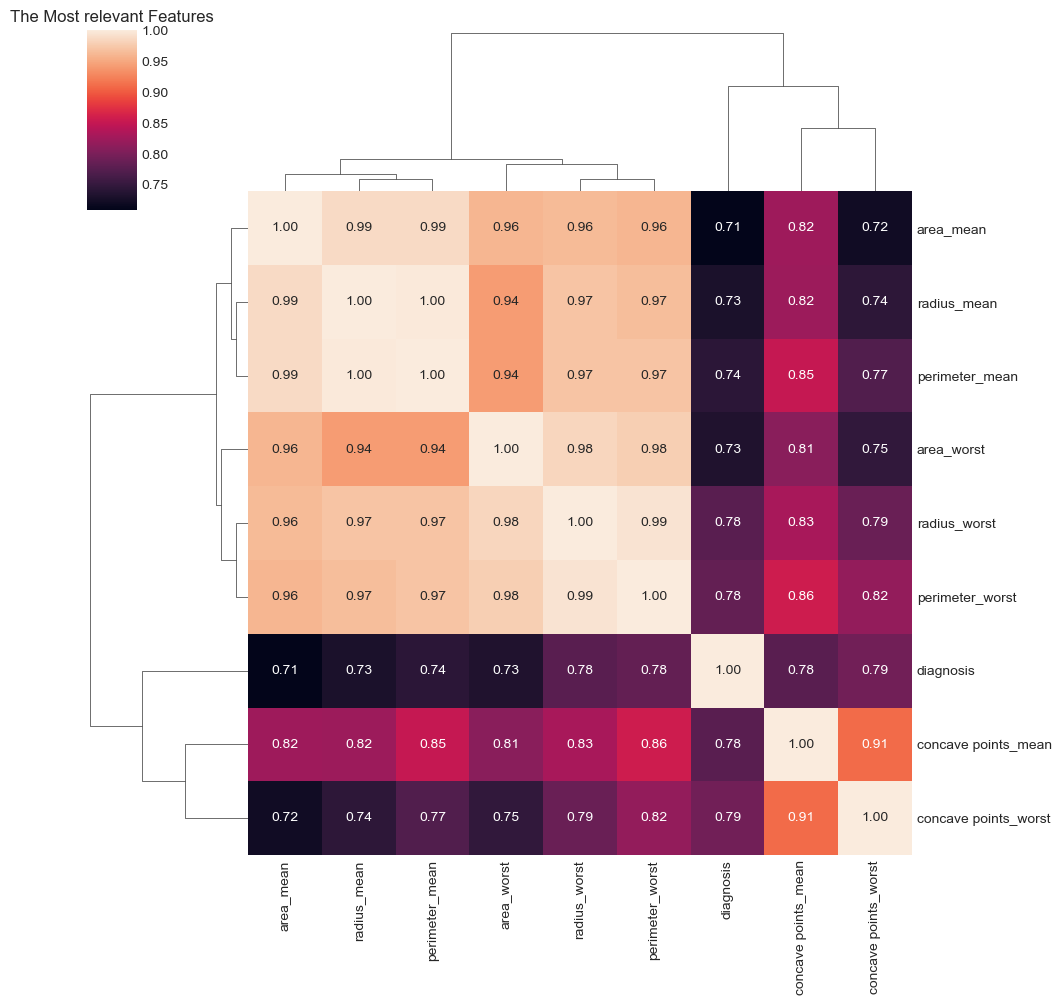

In [9]:
threshold = 0.70
filter = np.abs(corr_mtrx["diagnosis"]) > threshold
corr_feat = corr_mtrx.columns[filter].tolist()
plt.figure()
sns.clustermap(data[corr_feat].corr(), annot = True, fmt = ".2f")
plt.title("The Most relevant Features")
plt.show()

In [11]:
data_train = data[:len(data)]
X_train = data_train.drop(labels = "diagnosis",axis = 1)
y_train = data_train["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)

print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 381
X_test 188
y_train 381
y_test 188


# Logistic Regression

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
acc_log_train = round(log_reg.score(X_train, y_train)*100,2)
acc_log_test = round(log_reg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 88.98
Testing Accuracy: % 94.15


In [13]:
random_state = 42

classifier = [SVC(random_state = random_state),
              DecisionTreeClassifier(random_state = random_state),
              RandomForestClassifier(random_state = random_state),
              LogisticRegression(random_state = random_state),
              KNeighborsClassifier()]

In [23]:
Dec_Tree_feat = {"max_depth": range(1,20,2),
                 "min_samples_split" : range(10,500,20)}

SVC_feat = {"C": [1,10,50,100,200,300,500,1000],
            "kernel" : ["rbf"],
            "gamma": [0.001, 0.01, 0.5, 0.1, 1]}

Rnd_Forest_feat = {"max_features": [1,3,10],
                   "min_samples_split":[2,3,10],
                   "min_samples_leaf":[1,3,10],
                   "bootstrap": [False],
                   "n_estimators": [50,100,200,300],
                   "criterion":["gini"]}

Log_Reg_feat = {"C":np.logspace(-3,3,10),
                "penalty": ["l1","l2"]}

KNN_feat = {"metric": ["euclidean", "manhattan"],
            "n_neighbors": np.linspace(1,39,15, dtype=int).tolist(),
            "weights": ["uniform","distance"]}

classifiers_list = [SVC_feat,
                    Dec_Tree_feat,
                    Rnd_Forest_feat, 
                    Log_Reg_feat,
                    KNN_feat]

In [24]:
CV_result = []
best_estimations = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifiers_list[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy",n_jobs = -1,verbose=1)
    clf.fit(X_train,y_train)
    CV_result.append(clf.best_score_)
    best_estimations.append(clf.best_estimator_)
    print(CV_result[i])

Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.6194331983805668
Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.9289473684210525
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
0.9580296896086369
Fitting 10 folds for each of 20 candidates, totalling 200 fits
0.9001349527665319
Fitting 10 folds for each of 60 candidates, totalling 600 fits
0.8292847503373819


<Figure size 640x480 with 0 Axes>

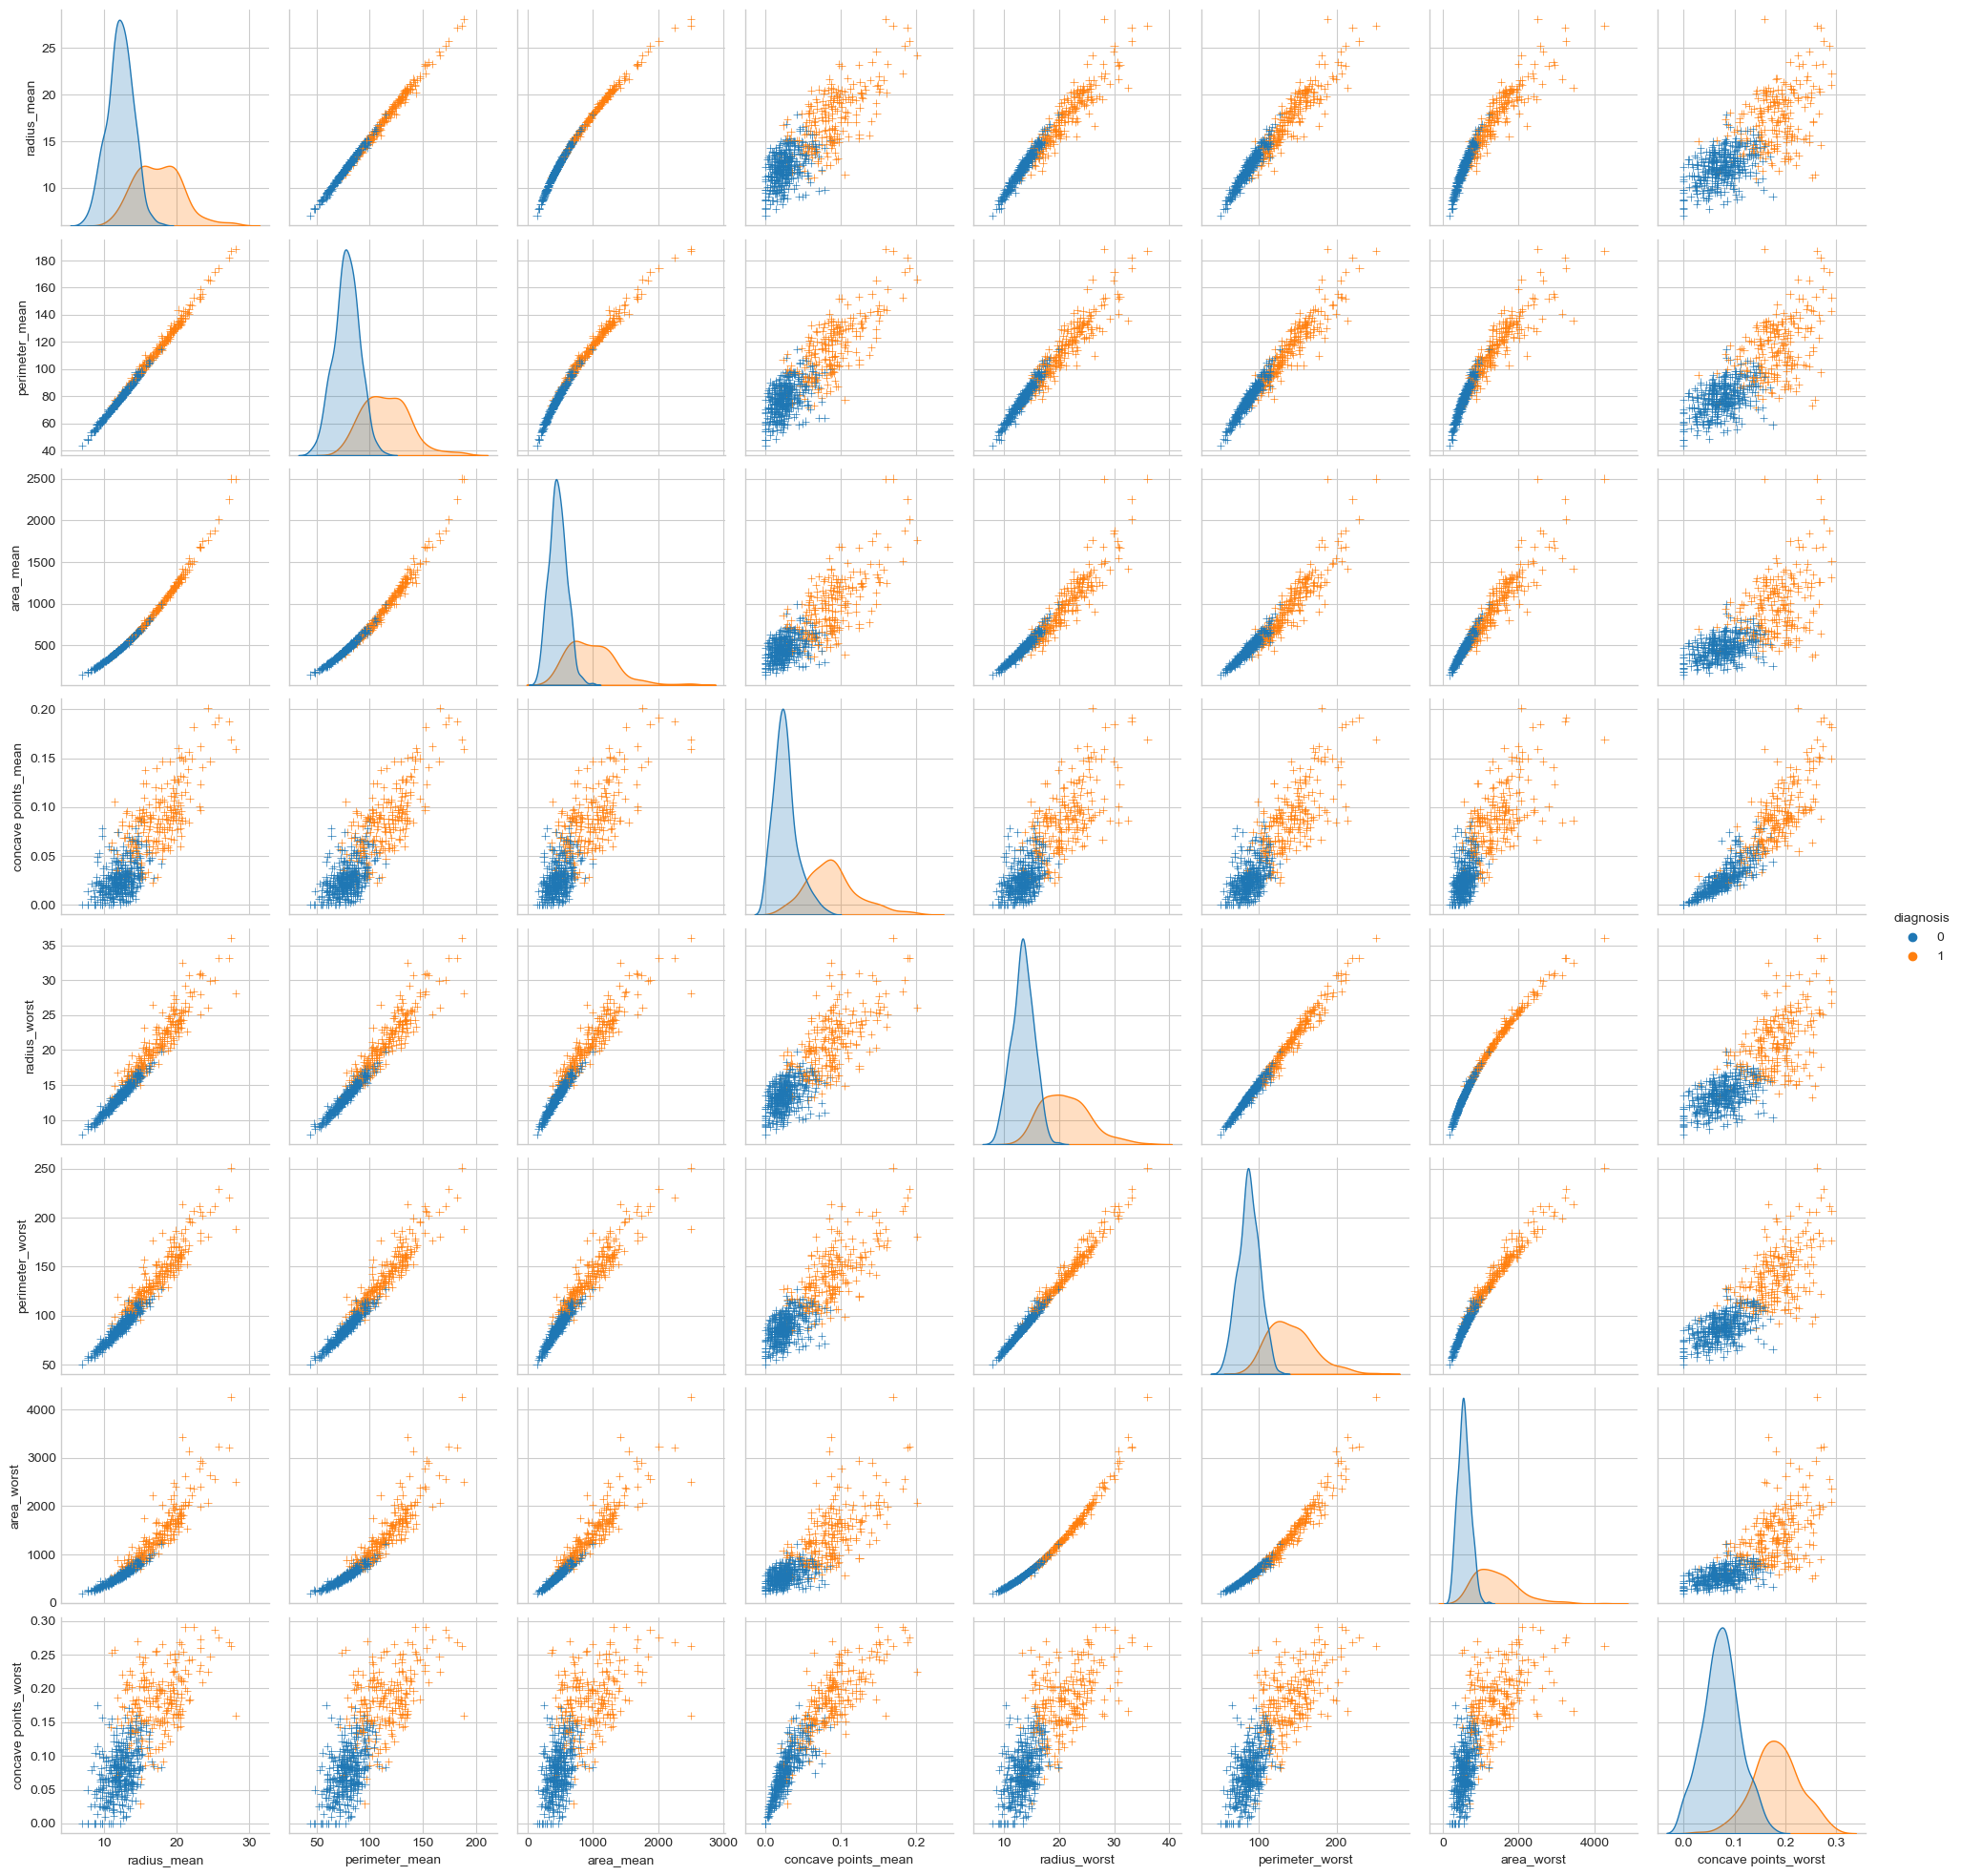

In [16]:
plt.figure()
sns.pairplot(data[corr_feat],diag_kind ="kde",markers="+", hue="diagnosis")

In [19]:
cv_results = pd.DataFrame({"Cross Validation Accuracy Means": CV_result, 
                           "ML Models": ["SVM", "DecisionTreeClassifier", 
                                         "RandomForest",
                                         "LogisticRegression",
                                         "KNeighborsclassifier"]})

cv_results

,Cross Validation Accuracy Means,ML Models
0,0.619433,SVM
1,0.928947,DecisionTreeClassifier
2,0.957962,RandomForest
3,0.900135,LogisticRegression
4,0.829285,KNeighborsclassifier


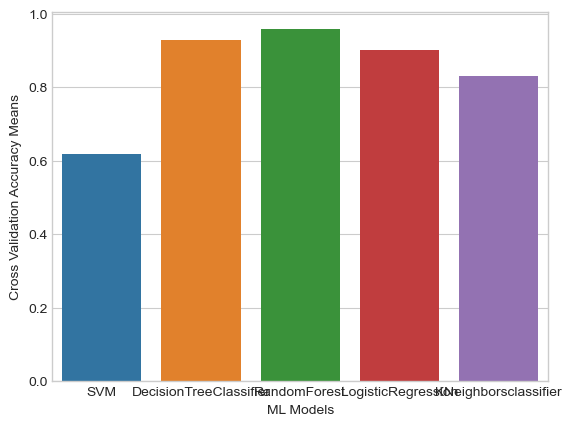

In [20]:
s = sns.barplot(cv_results, x="ML Models", y="Cross Validation Accuracy Means")

In [22]:
votingC = VotingClassifier(estimators = [("dt", best_estimations[1]),
("rfc",best_estimations[2]),
("lr",best_estimations[3])], 
voting = "soft", n_jobs = -1)

votingC = votingC.fit(X_train, y_train)

print(accuracy_score(votingC.predict(X_test),y_test))

0.9414893617021277
